In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, optimizers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

register_matplotlib_converters()
sns.set(style="darkgrid", font_scale=1.5)

LENGTH = 50
SUBSAMPLING = 20 #once every 20 seconds predict

# Train Model

In [2]:
def preprocessTestingData(data, length):
    hist = []
    target = []

    for i in range(len(data)-length):
        x = data[i:i+length]
        y = data[i+length]
        hist.append(x)
        target.append(y)
    
    # Convert into numpy arrays and shape correctly (len(dataset), length) and (len(dataset), 1) respectivly
    hist = np.array(hist)
    target = np.array(target)
    target = target.reshape(-1,1)

    #Reshape the input into (len(dataset), length, 1)
    hist = hist.reshape((len(hist), length, 1))

    return(hist, target)

In [3]:
def trainModel(datasets, length, model=None, quiet=False):
    for dataset in datasets:
        X_train, y_train = preprocessTestingData(dataset, length)

        if not model:
            # Create model and compile
            model = tf.keras.Sequential()
            model.add(layers.LSTM(units=32, return_sequences=True, input_shape=(length,1), dropout=0.2))
            model.add(layers.LSTM(units=32, return_sequences=True, dropout=0.2))
            model.add(layers.LSTM(units=32, dropout=0.2))
            model.add(layers.Dense(units=1))
            optimizer = optimizers.Adam()
            model.compile(optimizer=optimizer, loss='mean_squared_error')

        # Perform training
        output = 1
        if quiet:
            output = 0
        history = model.fit(X_train, y_train, epochs=6, batch_size=32, verbose=output)

        # Show loss
        if not quiet:
            loss = history.history['loss']
            epoch_count = range(1, len(loss) + 1)
            plt.figure(figsize=(6,4))
            plt.plot(epoch_count, loss, 'r--')
            plt.legend(['Training Loss'])
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()

    return model

In [4]:
def scaleData(paths):
    scaler = MinMaxScaler()
    datasets = []
    for path in paths:
        # perform partial fits on all datasets
        datasets.append(pd.read_csv(path)[['price']][::SUBSAMPLING]) # TODO remove, 120 subsample for every two minues
        scaler = scaler.partial_fit(datasets[-1])
    for i in range(len(datasets)):
        # once all partial fits have been performed, transform every file
        datasets[i] = scaler.transform(datasets[i])
    return (datasets, scaler)


Epoch 1/6
57/57 [==============================] - 7s 43ms/step - loss: 0.0228
Epoch 2/6
57/57 [==============================] - 2s 41ms/step - loss: 0.0016
Epoch 3/6
57/57 [==============================] - 2s 42ms/step - loss: 0.0012
Epoch 4/6
57/57 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 5/6
57/57 [==============================] - 2s 40ms/step - loss: 0.0011
Epoch 6/6
57/57 [==============================] - 2s 39ms/step - loss: 0.0010


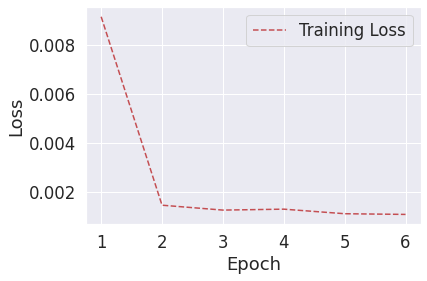

Epoch 1/6
22/22 [==============================] - 1s 40ms/step - loss: 7.6215e-04
Epoch 2/6
22/22 [==============================] - 1s 40ms/step - loss: 5.6651e-04
Epoch 3/6
22/22 [==============================] - 1s 39ms/step - loss: 5.2369e-04
Epoch 4/6
22/22 [==============================] - 1s 39ms/step - loss: 5.3013e-04
Epoch 5/6
22/22 [==============================] - 1s 43ms/step - loss: 4.7412e-04
Epoch 6/6
22/22 [==============================] - 1s 40ms/step - loss: 5.5169e-04


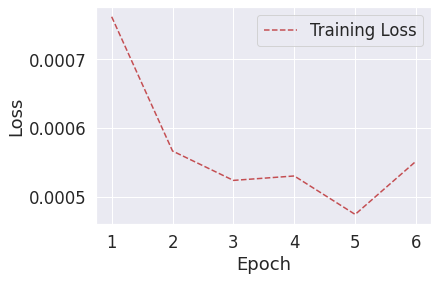

Epoch 1/6
25/25 [==============================] - 1s 41ms/step - loss: 0.0026
Epoch 2/6
25/25 [==============================] - 1s 43ms/step - loss: 5.5848e-04
Epoch 3/6
25/25 [==============================] - 1s 45ms/step - loss: 4.2901e-04
Epoch 4/6
25/25 [==============================] - 1s 41ms/step - loss: 4.4693e-04
Epoch 5/6
25/25 [==============================] - 1s 40ms/step - loss: 4.3565e-04
Epoch 6/6
25/25 [==============================] - 1s 39ms/step - loss: 4.3768e-04


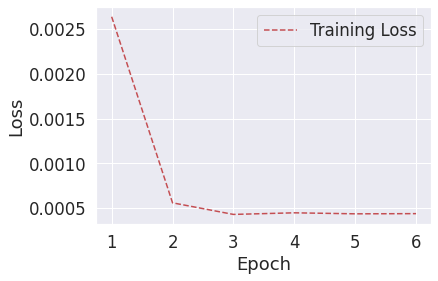

Epoch 1/6
54/54 [==============================] - 2s 40ms/step - loss: 0.0027
Epoch 2/6
54/54 [==============================] - 2s 39ms/step - loss: 0.0018
Epoch 3/6
54/54 [==============================] - 2s 39ms/step - loss: 0.0016
Epoch 4/6
54/54 [==============================] - 2s 40ms/step - loss: 0.0014
Epoch 5/6
54/54 [==============================] - 2s 40ms/step - loss: 0.0012
Epoch 6/6
54/54 [==============================] - 2s 35ms/step - loss: 0.0013


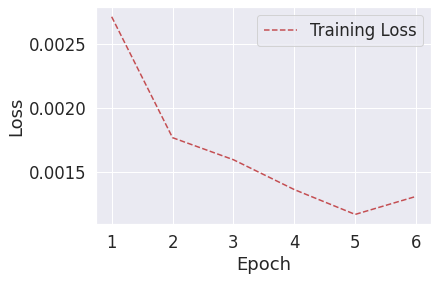

Epoch 1/6
15/15 [==============================] - 0s 33ms/step - loss: 0.0127
Epoch 2/6
15/15 [==============================] - 1s 34ms/step - loss: 0.0039
Epoch 3/6
15/15 [==============================] - 0s 33ms/step - loss: 0.0035
Epoch 4/6
15/15 [==============================] - 0s 32ms/step - loss: 0.0038
Epoch 5/6
15/15 [==============================] - 0s 33ms/step - loss: 0.0034
Epoch 6/6
15/15 [==============================] - 1s 34ms/step - loss: 0.0034


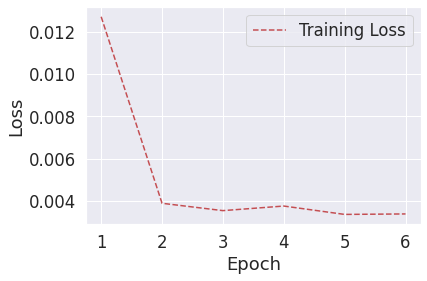

Epoch 1/6
58/58 [==============================] - 2s 35ms/step - loss: 8.6554e-04
Epoch 2/6
58/58 [==============================] - 2s 41ms/step - loss: 8.0070e-04
Epoch 3/6
58/58 [==============================] - 2s 40ms/step - loss: 8.0147e-04
Epoch 4/6
58/58 [==============================] - 2s 38ms/step - loss: 7.8484e-04
Epoch 5/6
58/58 [==============================] - 2s 39ms/step - loss: 7.9947e-04
Epoch 6/6
58/58 [==============================] - 2s 39ms/step - loss: 7.9798e-04


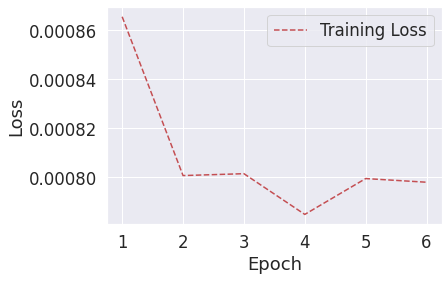

In [5]:
paths = ["../data/MorningTest.csv", "../data/MorningTest2.csv", "../data/MorningTest5.csv", "../data/MorningTest6.csv", "../data/MorningTest7.csv", "../data/MorningTest8.csv"]

datasets, scaler = scaleData(paths)

model = trainModel(datasets, LENGTH)

# Test Model
## Evaluation Helpers

In [6]:
def sub_sample(arr1, arr2, sub):
    return (arr1[::sub], arr2[::sub])

def evaluate_model(real_data, predicted_data, inherent_loss=2):
    real_data = real_data.reshape(len(real_data))
    predicted_data = predicted_data.reshape(len(predicted_data))

    real_diff = np.diff(real_data)
    predicted_diff = np.diff(predicted_data)

    correct_slopes = 0
    profit = 0
    for i in range(len(real_data)-1):
        if np.sign(real_diff[i]) == np.sign(predicted_diff[i]):
            correct_slopes = correct_slopes + 1
            
            # If we have a positive slope calculate profit
            if real_diff[i] > 0:
                # we subtract inherent_loss due to the limit market mechanics
                revenue = (real_data[i+1] - real_data[i]) - inherent_loss
                if revenue > 0:
                    # print(f"Found a profit where current value is {real_data[i+1]} last was {real_data[i]} net {revenue}")
                    profit = profit + revenue

        else:
            # We guessed wrong
            if predicted_diff[i] > 0:
                # we would have bought
                revenue = (real_data[i+1] - real_data[i]) - inherent_loss
                # print(f"Selling at a loss of {revenue}")
                profit = profit + revenue

    return (correct_slopes, profit)


In [7]:
def eval_model_on_dataset(actual, prediction, subsampling, inherent_loss):
    # Subsample the test points, this seems to increase accuracy
    real_subbed, pred_subbed = sub_sample(actual, prediction, subsampling)

    # Determine the number of cases in which we predicted a correct increase
    correct_slopes, profit = evaluate_model(real_subbed, pred_subbed, inherent_loss)

    print(f"Found {correct_slopes} out of {len(real_subbed)-1}")
    precent_success = (correct_slopes/(len(real_subbed)-1)) * 100
    print(f"{precent_success}%")
    print("Profit:", profit)
    return profit

## Test Model

In [8]:
def testModel(model, path_to_testing_dataset, quiet=False):

    datasets, scaler = scaleData([path_to_testing_dataset])

    hist, actual = preprocessTestingData(datasets[0], LENGTH)

    pred = model.predict(hist)

    pred_transformed = scaler.inverse_transform(pred)
    actual_transformed = scaler.inverse_transform(actual)

    if not quiet:
        plt.figure(figsize=(12,8))
        plt.plot(actual_transformed, color='blue', label='Real')
        plt.plot(pred_transformed, color='red', label='Prediction')
        plt.title('ETH Price Prediction')
        plt.legend()
        plt.show()

    return eval_model_on_dataset(actual=actual_transformed, prediction=pred_transformed, subsampling=1, inherent_loss=2)


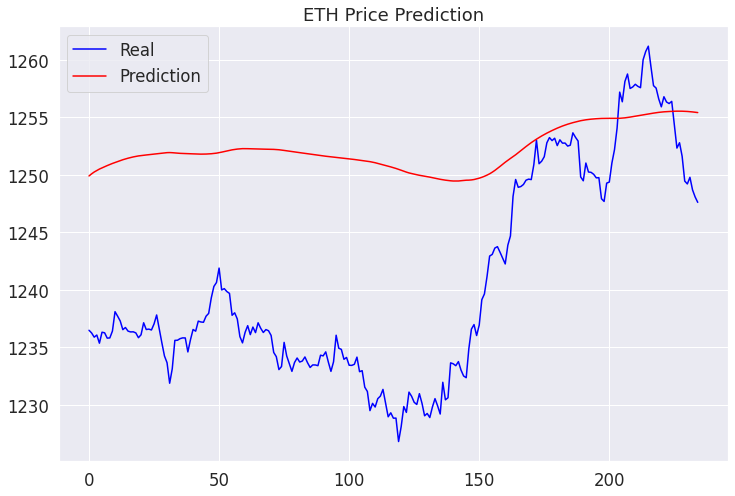

Found 123 out of 234
52.56410256410257%
Profit: -169.8500969999991


-169.8500969999991

In [9]:
testModel(model, "../data/MorningTest4.csv")

# Single Prediction

In [10]:
# For example, if we just want to predict the next timestep in the dataset we can prepare it as such:

# 1. get the [length] last points from the data set since that's what we care about
length = LENGTH
most_recent_period = pd.read_csv('../data/MorningTest2.csv')[['price']].tail(length)

# 2. convert to numpy array 
most_recent_period = np.array(most_recent_period)

# 3. normalize data
scaler = MinMaxScaler()
most_recent_period_scaled = scaler.fit_transform(most_recent_period)

# 4. reshape to the 3D tensor we expected (1, length, 1)
most_recent_period_scaled_shaped = most_recent_period_scaled.reshape((1, length, 1))

# 5. Predict
prediction = model.predict(most_recent_period_scaled_shaped)

# 6. Un-normalize the data
result = scaler.inverse_transform(prediction)

print(f"${result[0][0]}")

$1140.205322265625


# Prediction Success Evaluation

In [11]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets
INFO:tensorflow:Assets written to: my_model/assets


In [12]:
pink = models.load_model("my_model")

In [13]:
profits = []
for length in np.arange(360, 5, -5):
    for sub in np.arange(10, 480, 10):
        try:
            LENGTH = length
            SUBSAMPLING = sub
            model = trainModel(datasets, LENGTH, quiet=True)
            profit = testModel(model, "../data/MorningTest.csv", quiet=True)
            profits.append((profit, length, sub))
            print(sorted(profits, key=lambda tup: -tup[0])[0:20])
        except:
            pass


Found 1761 out of 3339
52.7403414195867%
Profit: -2127.8010829999985
[(-2127.8010829999985, 360, 10)]
Found 739 out of 1489
49.63062458025521%
Profit: -1037.3275759999997
[(-1037.3275759999997, 360, 20), (-2127.8010829999985, 360, 10)]
Found 448 out of 873
51.317296678121416%
Profit: -674.8314689999997
[(-674.8314689999997, 360, 30), (-1037.3275759999997, 360, 20), (-2127.8010829999985, 360, 10)]
Found 286 out of 564
50.70921985815603%
Profit: -420.29075799999987
[(-420.29075799999987, 360, 40), (-674.8314689999997, 360, 30), (-1037.3275759999997, 360, 20), (-2127.8010829999985, 360, 10)]
Found 180 out of 379
47.4934036939314%
Profit: -294.25286400000095
[(-294.25286400000095, 360, 50), (-420.29075799999987, 360, 40), (-674.8314689999997, 360, 30), (-1037.3275759999997, 360, 20), (-2127.8010829999985, 360, 10)]
Found 129 out of 256
50.390625%
Profit: -158.05513200000019
[(-158.05513200000019, 360, 60), (-294.25286400000095, 360, 50), (-420.29075799999987, 360, 40), (-674.8314689999997,

In [6]:
print("FINAL RESULTS")
sorted(profits, key=lambda tup: tup[0])[0:20]


FINAL RESULTS


NameError: name 'profits' is not defined